In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('diabetes.csv')

In [19]:
correlation_matrix = df.corr()



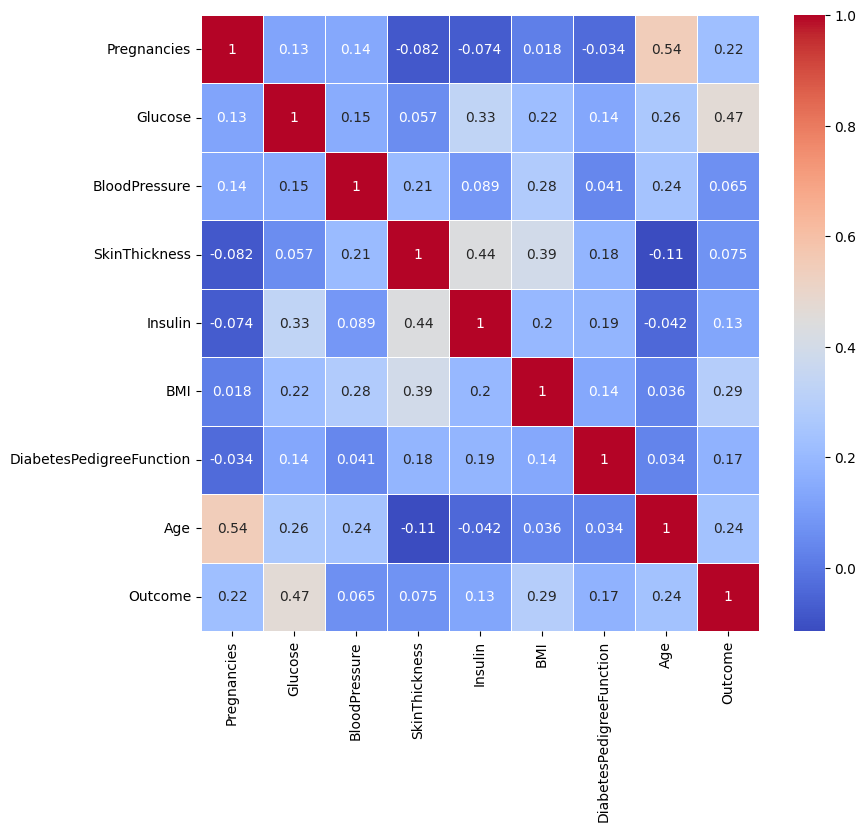

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix ,annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# Correlation Explanation
Correlation matrix shows the correlations between the parameters

For example here we can see that on the first row with pregnancies -- the age column has a substantial correlation.

Whereas with our Outcome set of diabetes, we can see that Glucose levels have an effect

### Creating Histograms of each parameter

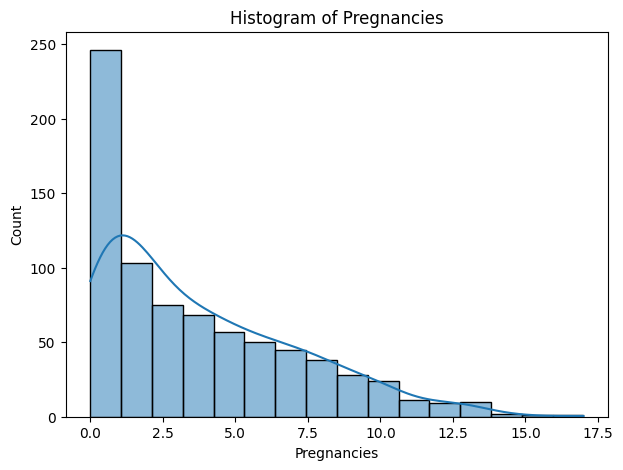

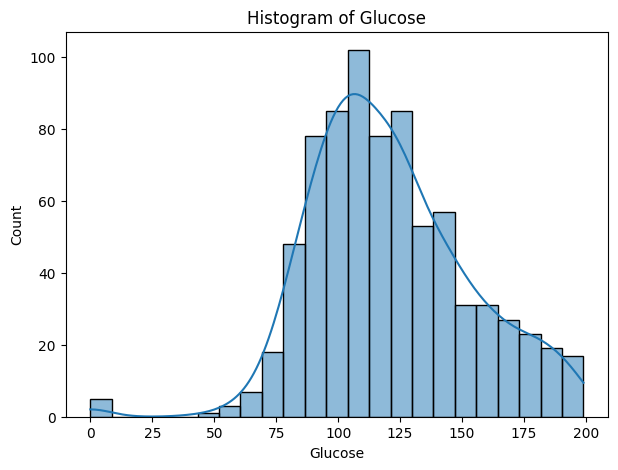

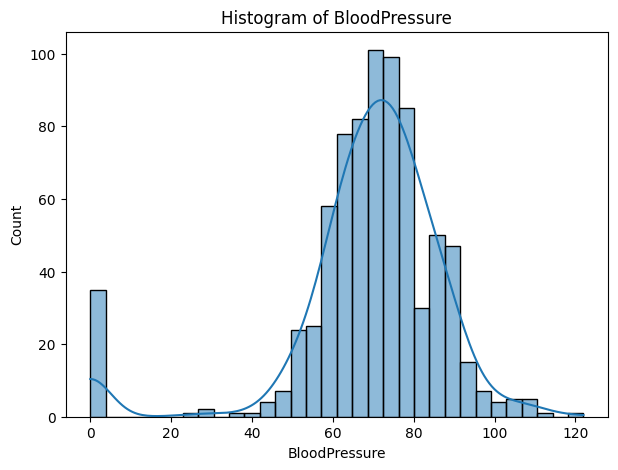

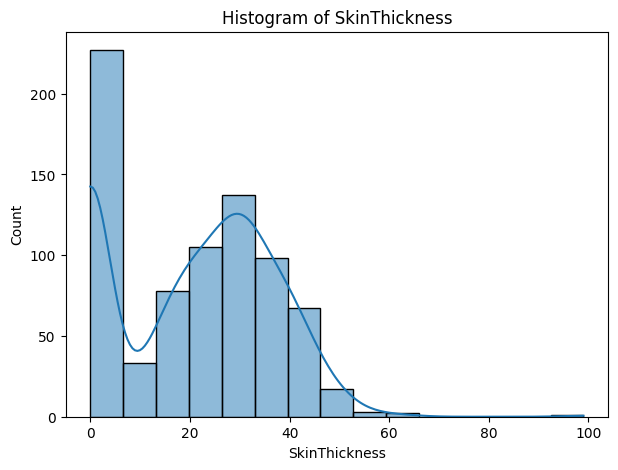

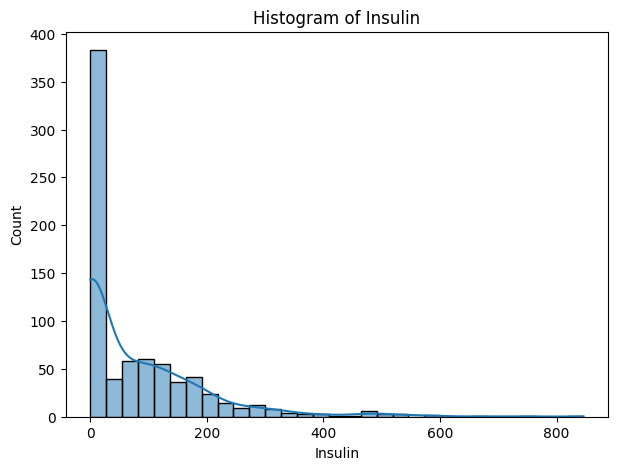

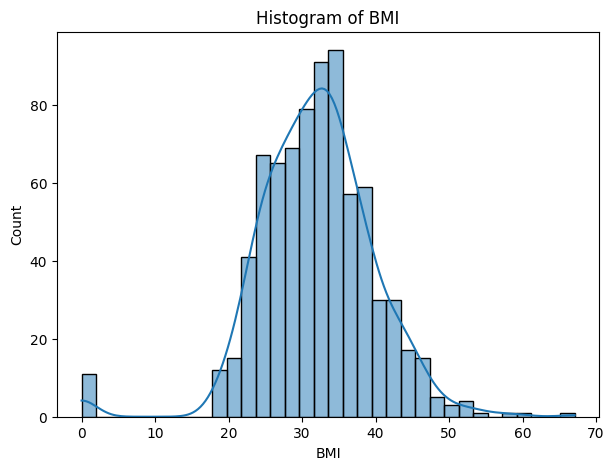

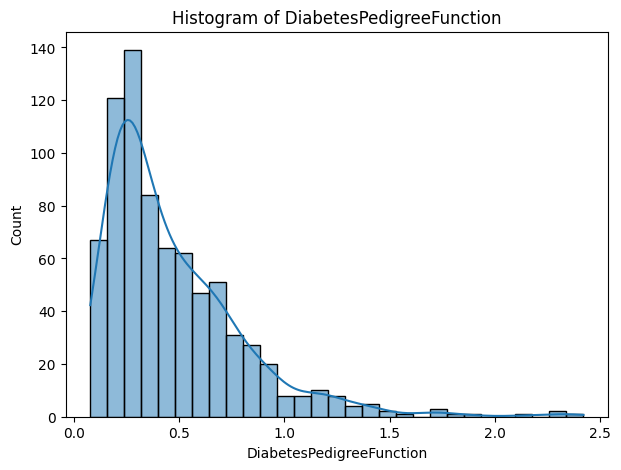

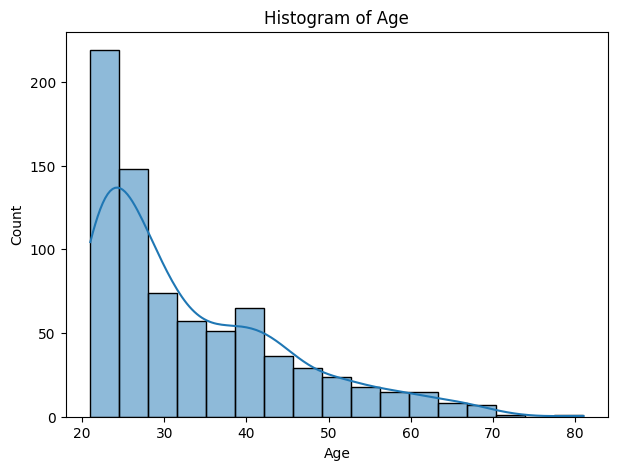

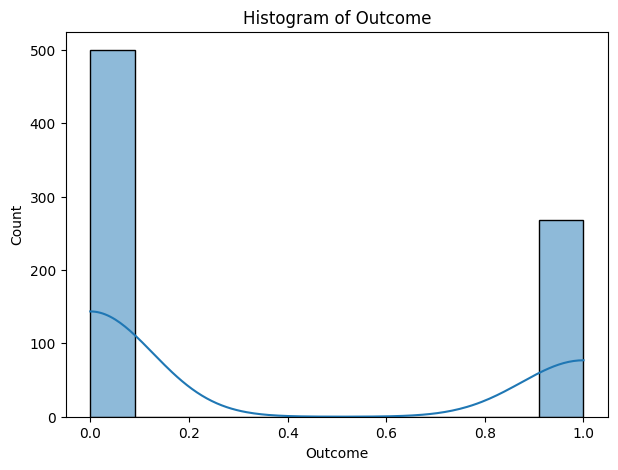

In [9]:
for column in df.columns:
  plt.figure(figsize=(7,5))
  sns.histplot(df[column], kde=True)
  plt.title(f'Histogram of {column}')
  plt.show()

# Explanation of histograms
#### Glucose
These histograms tell us some things such as the Glucose levels seem to be approximately normally distbuted with the average being around 100 for the dataset
#### Blood Pressure
These histograms tell us that blood pressure levels are normally distributed with most people having between 40 and 100 levels.
#### Glucose
Skin Thickness levels are between 0 and 40
#### Insulin
The histogram seems to show that the insulin levels are in the lower rangeof 0-200
#### BMI
The BMI of the respondents seem to show that the levels are approximately distributed being with the average levels around 30-40.
#### Diabetes Pedigree
Show us that the pedigree level for most people are quite low being from 0-0.5.
#### Age
The age of the respondents in this dataset seem to be relatively low with most people being under the age of 40.



 Mean and Standard Deviation for each paramater

In [ ]:
for column in df.columns:

  print(f"Standard deviation for {column} : {df[column].std()}")
  print(f"Mean for {column} : {df[column].mean()}")
  print("========================")

Standard deviation for Pregnancies : 3.3695780626988694
Mean for Pregnancies : 3.8450520833333335
Standard deviation for Glucose : 31.97261819513622
Mean for Glucose : 120.89453125
Standard deviation for BloodPressure : 19.355807170644777
Mean for BloodPressure : 69.10546875
Standard deviation for SkinThickness : 15.952217567727637
Mean for SkinThickness : 20.536458333333332
Standard deviation for Insulin : 115.24400235133817
Mean for Insulin : 79.79947916666667
Standard deviation for BMI : 7.884160320375446
Mean for BMI : 31.992578124999998
Standard deviation for DiabetesPedigreeFunction : 0.3313285950127749
Mean for DiabetesPedigreeFunction : 0.47187630208333325
Standard deviation for Age : 11.760231540678685
Mean for Age : 33.240885416666664
Standard deviation for Outcome : 0.47695137724279896
Mean for Outcome : 0.3489583333333333


These statistics give you a basic understanding of the data's distribution and variability. The wide standard deviations in certain features like Insulin and SkinThickness suggest significant differences among individuals in those aspects, which is important to consider in any analysis or modeling. The normalization of this data will help to standardize these features onto the same scale, which is particularly beneficial for many machine learning algorithms.

# Checking for missing values in the parameters

In [21]:
missing_values = df.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Normalize each parameter to have a mean of zero & Standard deviation of one

Make sure not to normalize the outcome here as it needs to be 0 or 1 for working with the logistic Regression Models .

In [23]:
from sklearn.preprocessing import StandardScaler


features = df.drop('Outcome', axis=1)
target = df[['Outcome']]

scaler = StandardScaler()

# Fit and transform the data(without target)
scaled_features = scaler.fit_transform(features)

# Convert the scaled features array back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Concat the scaled features with the target column 'Outcome
normalized_df = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())



   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


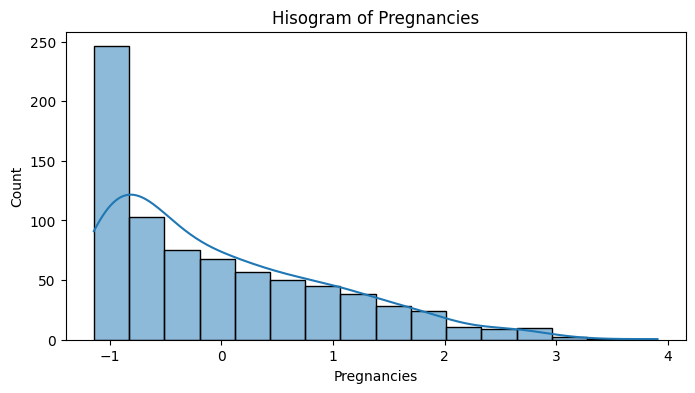

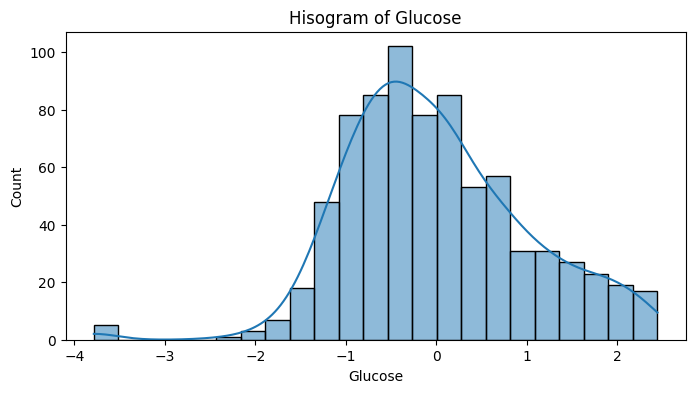

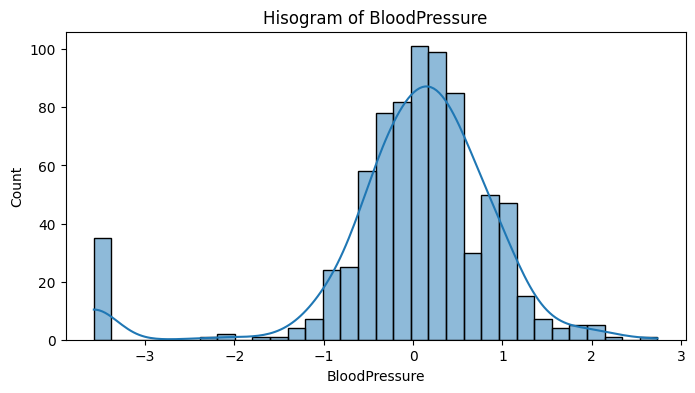

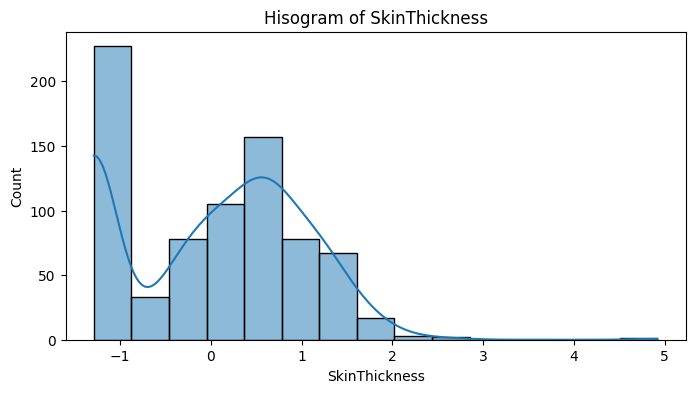

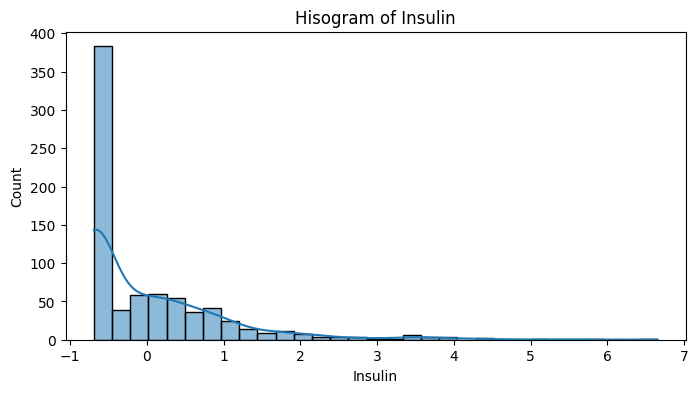

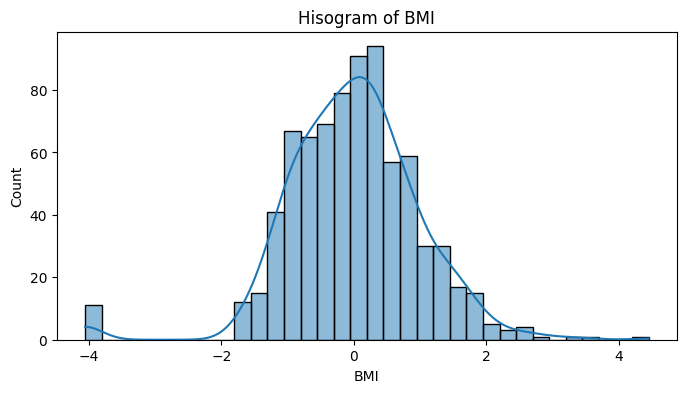

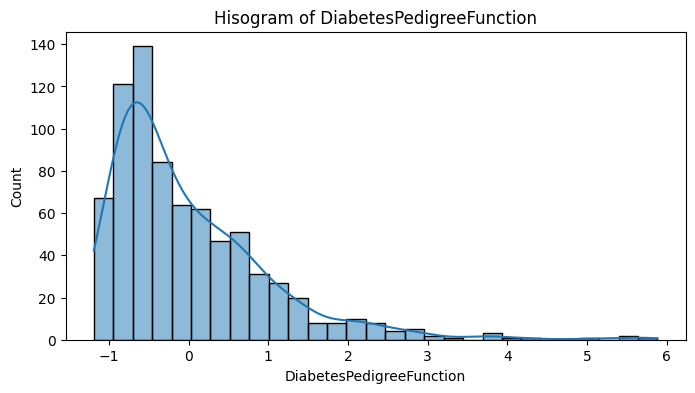

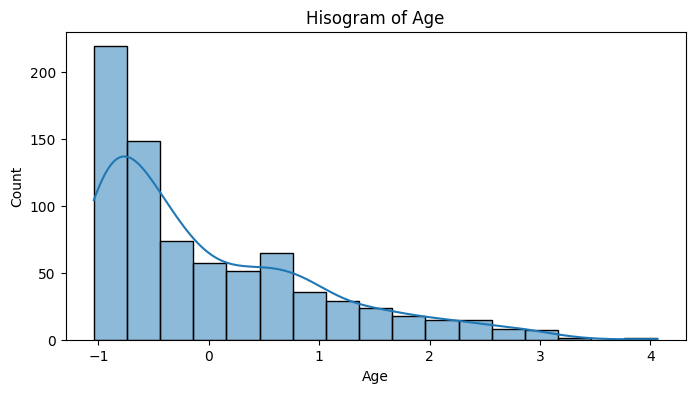

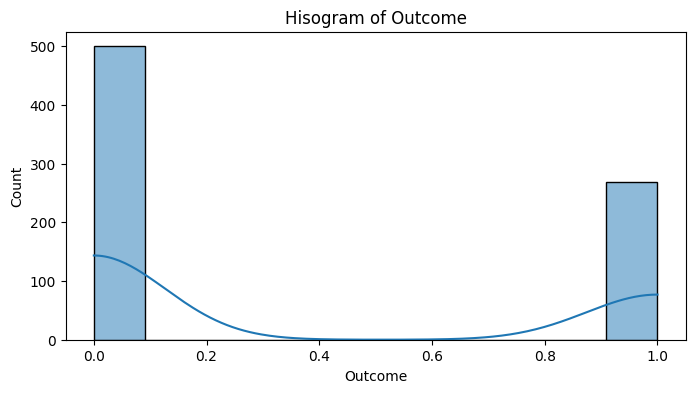

In [24]:
for column in normalized_df.columns:
  plt.figure(figsize=(8,4))
  sns.histplot(normalized_df[column], kde=True)
  plt.title(f'Hisogram of {column}')
  plt.show()

# Checking if data is balanced or imbalanced

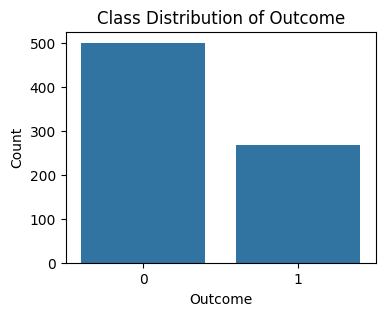

In [25]:
class_distribution = normalized_df['Outcome'].value_counts()


plt.figure(figsize=(4, 3))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#   Splitting the dataset into training and testing etc

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#dataset is already pre_processed above
X = normalized_df.drop('Outcome', axis=1) #features
y = normalized_df['Outcome'] # target variable

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Conducting Logistical Regression with Scikit learn

In [43]:
#initialize and train the logistic regression model
model = LogisticRegression()

#fit the model with data
model.fit(X_train, y_train)

# Predict on the training set
train_predictions = model.predict(X_train)

test_predictions = model.predict(X_test)



### Evaluation of model in train

Train Accuracy: 
0.7695652173913043


Classification Report Train: 
                  precision    recall  f1-score   support

without diabetes       0.78      0.88      0.83       294
   with diabetes       0.73      0.57      0.64       166

        accuracy                           0.77       460
       macro avg       0.76      0.73      0.74       460
    weighted avg       0.77      0.77      0.76       460



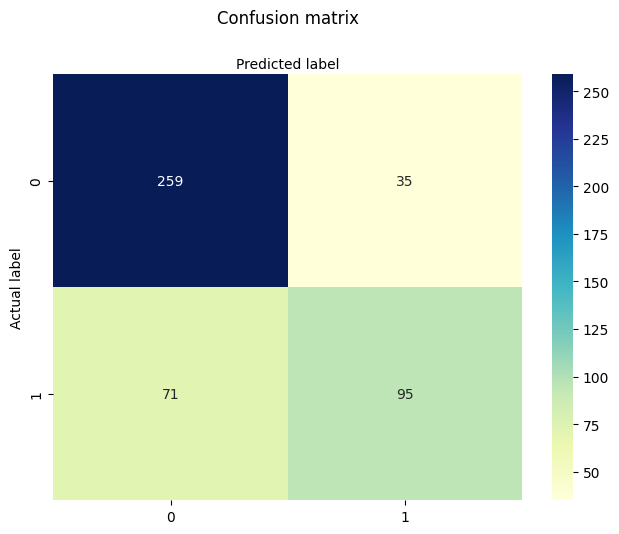

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
target_names = ['without diabetes', 'with diabetes']

#getting confusion matrix for train
cnf_matrix_train = confusion_matrix(y_train, train_predictions)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Train Model Accuracy: ")
print( accuracy_score(y_train, train_predictions))
print("\n")


print("Classification Report Train: ")
print( classification_report(y_train, train_predictions, target_names=target_names))


### Evaluation of model in Test

Test Accuracy: 
0.7662337662337663


Classification Report Test: 
                  precision    recall  f1-score   support

without diabetes       0.84      0.81      0.82       104
   with diabetes       0.63      0.68      0.65        50

        accuracy                           0.77       154
       macro avg       0.73      0.74      0.74       154
    weighted avg       0.77      0.77      0.77       154



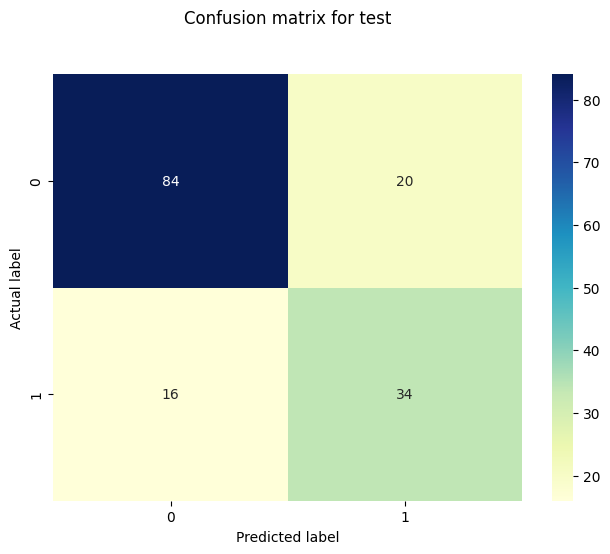

In [58]:

#getting confusion matrix for test
cnf_matrix_test = confusion_matrix(y_test, test_predictions)


#doing a heatmap for the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix for test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# getting accuracy score for test model
print("Test Model Accuracy: ")
print( accuracy_score(y_test, test_predictions))
print("\n")

#gettng classification report
print("Classification Report Test: ")
print( classification_report(y_test, test_predictions, target_names=target_names))

